# Presentación Final
Barbara Marcos von der Meden A01720403
## Student's Performance
Base de datos que describe los resultados de unos estudiantes después de presentar un examen con secciones de matemáticas, lectura, y escritura.

## Variables de Interés
Mis variables de interés son 'Gender', 'Race/Ethnicity', 'Parental level of education', 'Test preparation course', 'Math score', 'Reading score' y 'Writing score'

*Gender es una variable categórica, explica si la persona es hombre o mujer.

*Race/Ethnicity es una variable categórica, explica a cuál raza/etnicidad pertenece la persona.

*Parental level of education es una variable categórica, explica el nivel de educación de los padres de la persona.

*Test preparation course es una variable categórica, explica si la persona se preparó o no para el examen.

*Math score es una variable numérica (int), explica el resultado de la persona en la sección de matemáticas.

*Reading score es una variable numérica (int), explica el resultado de la persona en la sección de lectura.

*Writing score es una variable numérica (int), explica el resultado de la persona en la sección de escritura.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.drop('lunch', axis =1)

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,none,72,72,74
1,female,group C,some college,completed,69,90,88
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95
996,male,group C,high school,none,62,55,55
997,female,group C,high school,completed,59,71,65
998,female,group D,some college,completed,68,78,77


## Pregunta 1: ¿Influye la educación de los padres en el resultado del hijo?

In [5]:
pivot=pd.pivot_table(df,
                        index='parental level of education',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
All,66.089000,69.169000,68.054000


In [6]:
pivot=pivot.drop(['All'],
                             axis= 0)

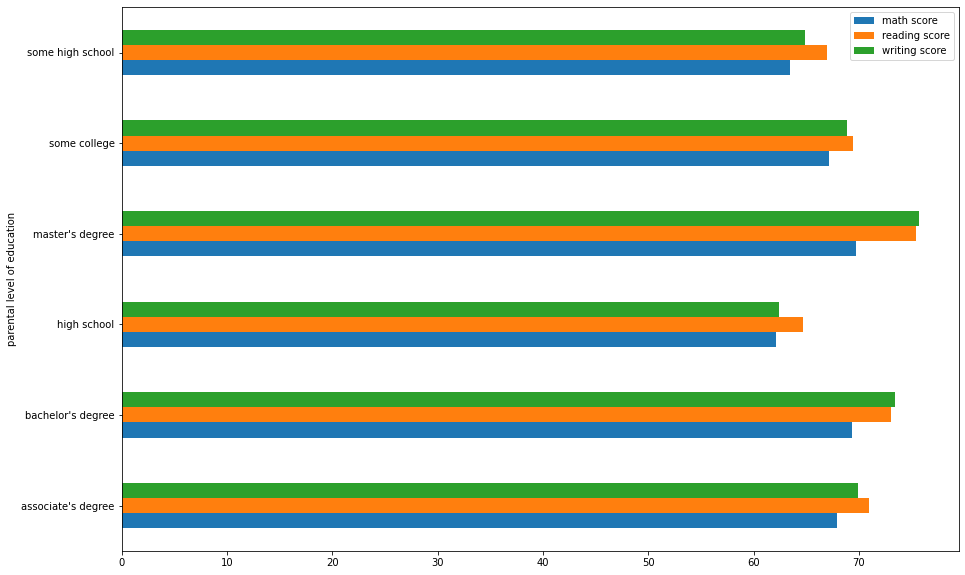

In [7]:
pivot.plot(kind = 'barh', figsize = (15,10))

## Conclusión Pregunta 1:

Existe una ligera correlación entre el nivel de estudio de los padres y los resultados de los hijos, se puede notar que los hijos de padres con master's degree tuvieron un mejor resultado mientras que los hijos de padres con puro high school tuvieron ligeramente un peor resultado.

## Pregunta 2: ¿Influye la preparación del estudiante en su resultado?¶

In [8]:
pivot=pd.pivot_table(df,
                        index='test preparation course',
                        aggfunc='mean',
                        values=['math score','reading score','writing score'],
                        margins=True,
                       )
pivot

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673
All,66.089000,69.169000,68.054000


In [9]:
pivot=pivot.drop(['All'],
                             axis= 0)

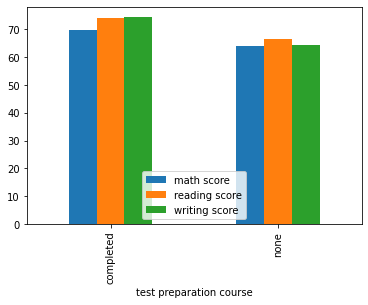

In [10]:
pivot.plot(kind = 'bar')

## Conclusión Pregunta 2:

Se observa que los estudiantes que completaron el curso de preparación para el examen tuvieron un mejor resultado que aquellos que no tomaron el curso.

## Pregunta 3: ¿Influye la la raza/etnicidad de la persona en su resultado en la sección de matemáticas?

In [11]:
pivot=pd.pivot_table(df,
                        index='race/ethnicity',
                        aggfunc='mean',
                        values=['math score'],
                        margins=True,
                       )
pivot

,math score
race/ethnicity,
group A,61.629213
group B,63.452632
group C,64.463950
group D,67.362595
group E,73.821429
All,66.089000


In [12]:
pivot=pivot.drop(['All'],
                             axis= 0)

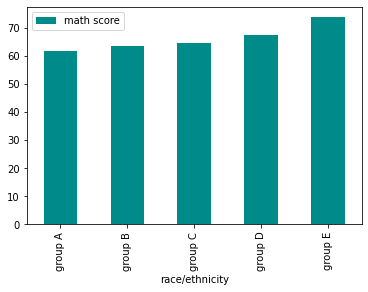

In [13]:
pivot.plot(kind = 'bar', color = 'darkcyan')

## Conclusión Pregunta 3:

Se observa que la gente que pertenece a la raza/etnicidad del grupo E obtuvo un mejor resultado en la sección de matemáticas, mientras que la gente que pertenece al grupo A tuvo ligeramente un peor resultado.

## Pregunta 4: ¿Tiene correlación el resultado de los estudiantes en las secciones de escritura y lectura?

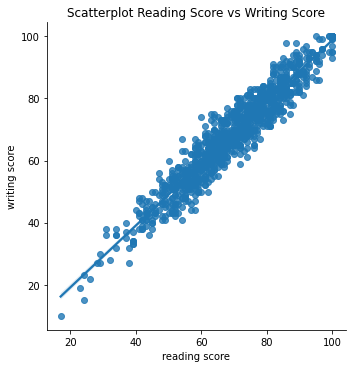

In [14]:
sns.lmplot(x = 'reading score',
           y = 'writing score',
           data = df,)
plt.title('Scatterplot Reading Score vs Writing Score')
plt.show()

## Conclusión Pregunta 4:

Se observa que si existe una fuerte correlación entre el resultado de los estudiantes en la sección de escritura y lectura.

## Pregunta 5: ¿Cuál es el porcentaje de cada nivel de estudios de los padres?

In [15]:
counts = df['parental level of education'].value_counts()
counts = counts.to_frame()
counts.loc[:,'parental level of education']
counts['%'] = counts.loc[:,'parental level of education']/counts.loc[:,'parental level of education'].sum(axis=0)*100
counts = counts.reindex(['some high school', 'high school', 'some college','associate\'s degree','bachelor\'s degree','master\'s degree'])
counts = counts.reset_index()
counts = counts.rename({'index': 'parental_education'},
                       axis = 1,

                      )
counts

,parental_education,parental level of education,%
0,some high school,179,17.9
1,high school,196,19.6
2,some college,226,22.6
3,associate's degree,222,22.2
4,bachelor's degree,118,11.8
5,master's degree,59,5.9


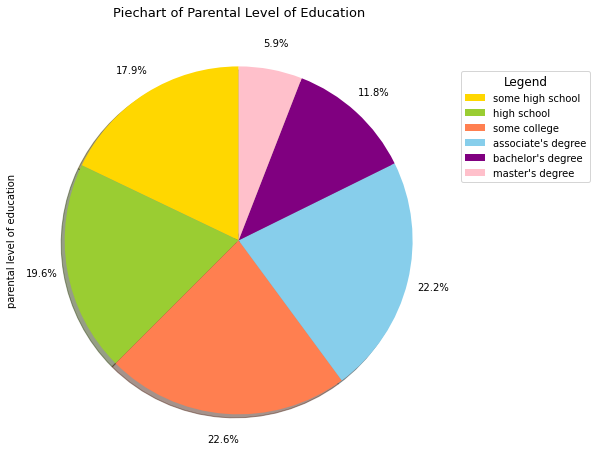

In [16]:
color_list = ['gold','yellowgreen','coral','skyblue','purple','pink']
counts['parental level of education'].plot(kind = 'pie',
                   figsize = (15, 8),
                   startangle = 90,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.15,
                   colors = color_list,
                   shadow = True,
                  )
plt.legend(labels = counts.parental_education,
           title = 'Legend',
           bbox_to_anchor = (1.0,0.9),
           title_fontsize = 12
          )
plt.title('Piechart of Parental Level of Education', fontsize = 13)
plt.show()

## Conclusión Pregunta 5:

Se observa que el 19.6% de los padres cuentan con high school, el 22.6% con some college, el 22.2% con associate's degree, el 11.8% con bachelor's degree, el 5.9% con master's degree, y el 17.9% con some high school

In [17]:
import statsmodels.api as sm

## Pregunta 6: ¿Cuál es el rango de calificaciones de Math Score, Reading Score y Writing Score?

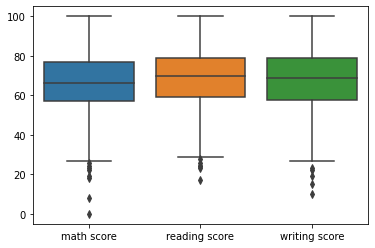

In [18]:
sns.boxplot(data = df.loc[:,['math score','reading score', 'writing score']],
           )

## Conclusión Pregunta 6:

En los boxplots superiores se puede observar el rango de las calificaciones de cada materia, así como la mediana. También se pueden notar los datos atípicos de cada materia.

## Pregunta 7: ¿Cuál es el impacto de Race en Reading Score?

In [19]:
df = df.rename(columns = {'reading score':'reading_score'})
df = df.rename(columns = {'race/ethnicity':'race'})
df['race'] = df.race.replace({'group A':1,'group B':2,'group C':3,'group D':4,'group E':5})

df

,gender,race,parental level of education,lunch,test preparation course,math score,reading_score,writing score
0,female,2,bachelor's degree,standard,none,72,72,74
1,female,3,some college,standard,completed,69,90,88
2,female,2,master's degree,standard,none,90,95,93
3,male,1,associate's degree,free/reduced,none,47,57,44
4,male,3,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,5,master's degree,standard,completed,88,99,95
996,male,3,high school,free/reduced,none,62,55,55
997,female,3,high school,free/reduced,completed,59,71,65
998,female,4,some college,standard,completed,68,78,77


In [20]:
modelA =sm.OLS.from_formula('reading_score ~ race', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          reading_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.51
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           3.99e-06
Time:                        04:08:51   Log-Likelihood:                -4088.8
No. Observations:                1000   AIC:                             8182.
Df Residuals:                     998   BIC:                             8191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.3521      1.335     47.459      0.000      60.733      65.972
race           1.8327      0.395      4.638      0.000       1.057       2.608
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.438
Skew:                          -0.248   Prob(JB):                      0.00541
Kurtosis:                       2.930   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones
- Variable dependiente: Reading Score
- Variable independiente: Race
- R-squared: 0.021 (el modelo no es muy eficiente)
- Df model: 1
- Fórmula: 63.3521 + 1.8327 * race

In [32]:
### Case study: 
print('Reading score de un estudiante del race B: \t', 63.3521 + 1.8327*2)
print('\t')
df.iloc[:1,:]

Reading score de un estudiante del race B: 	 67.0175
	


,gender,race,parental level of education,lunch,test preparation course,math score,reading_score,writing score
0,female,2,bachelor's degree,standard,none,72,72,74


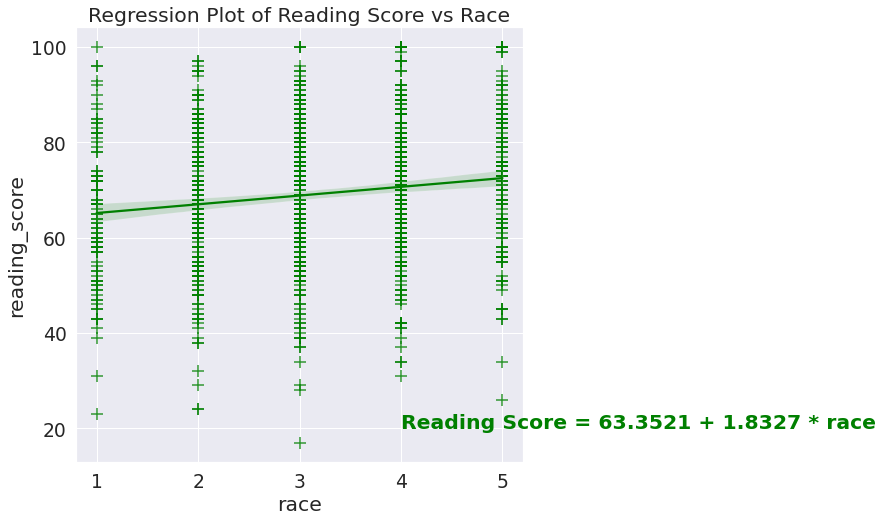

In [38]:
plt.figure(figsize = (8,8))
sns.set(font_scale = 1.7)

reg_plot = sns.regplot(x = 'race',
            y = 'reading_score',
            data = df,
           marker = '+',
           color = 'green',
           scatter_kws = {'s':150}
           )
reg_plot.set_title('Regression Plot of Reading Score vs Race')
reg_plot.text(4, 20, 'Reading Score = 63.3521 + 1.8327 * race',
              color = 'green',
              weight = 'semibold',
              size = 'medium'
             )

             
plt.show()

In [25]:
RESIA = resultA.resid
RESIA

0       4.982543
1      21.149883
2      27.982543
3      -8.184796
4       9.149883
         ...    
995    26.484562
996   -13.850117
997     2.149883
998     7.317222
999    15.317222
Length: 1000, dtype: float64

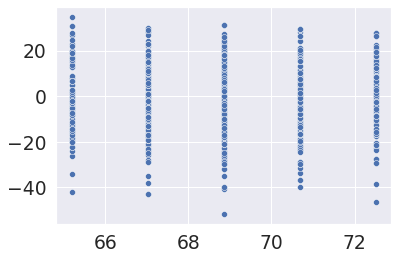

In [26]:
resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y = RESIA)

## Conclusión Pregunta 7
Se concluye que el modelo no es tan eficiente para determinar el reading score, se recomienda tomar en cuenta más variables, no solo Race, para llegar a un modelo más adecuado.

## Limitaciones
*No viene la raza/etnicidad de manera específica, solo viene como 'grupo A'.

*En 'parental level of education' no se especifica si es el nivel de estudios del padre, de la madre, o de ambos.

*Modelo de regresión obtenido no es tan eficiente.